<a href="https://colab.research.google.com/github/lisamarieholz/MachineLearning/blob/main/PCA_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Data/Country-data.csv", sep = ",")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [ ]:
pca = PCA(n_components = 2)
X_pca=pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[-2.91302459e+00,  9.56205755e-02],
       [ 4.29911330e-01, -5.88155666e-01],
       [-2.85225077e-01, -4.55174413e-01],
       [-2.93242265e+00,  1.69555507e+00],
       [ 1.03357587e+00,  1.36658709e-01],
       [ 2.24072616e-02, -1.77918658e+00],
       [-1.01583737e-01, -5.68251724e-01],
       [ 2.34216461e+00, -1.98845915e+00],
       [ 2.97376366e+00, -7.34688659e-01],
       [-1.81486997e-01, -4.02865873e-01],
       [ 1.26874386e+00, -6.56588363e-01],
       [ 1.67099640e+00,  5.61162493e-01],
       [-1.12385093e+00, -9.61397405e-01],
       [ 1.08137420e+00, -4.81969530e-01],
       [ 5.80025152e-01,  5.35326834e-01],
       [ 3.14378596e+00,  6.63547921e-01],
       [ 2.11255447e-01,  6.99242662e-01],
       [-2.67231388e+00,  4.18172125e-01],
       [-1.56570962e-01,  7.77395617e-01],
       [-7.93851561e-01, -1.20261085e-01],
       [ 9.95867143e-01, -9.71888439e-01],
       [-8.82087639e-01,  4.57368180e-01],
       [ 1.40781361e-01, -2.15107731e+00],
       [ 2.

# 2.) Plot a Scatter plot of the PCs on the axis

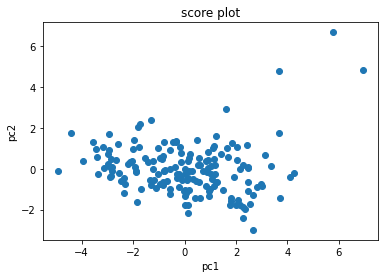

In [ ]:
plt.scatter(x=X_pca[:,0],y=X_pca[:,1])

plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title('score plot')

plt.show()

In [ ]:
df #original dataset

# 3.) Rank the features in order of importance according to PCA

In [ ]:
loadings = pca.components_

In [ ]:
loadings #first list second list

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [ ]:
pd.DataFrame(np.sum(loadings**2, axis=0))

,0
0,0.213201
1,0.456567
2,0.081843
3,0.477420
4,0.159263
5,0.037386
6,0.230937
7,0.187094
8,0.156288


In [ ]:
feature_names = df.columns[1:]

In [ ]:
feature_importance = pd.DataFrame(np.sum(loadings**2, axis=0))

In [ ]:
feature_importance.index=feature_names

In [ ]:
feature_importance.sort_values(0, ascending = False)

,0
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [ ]:
feature_names = df.columns[1:]

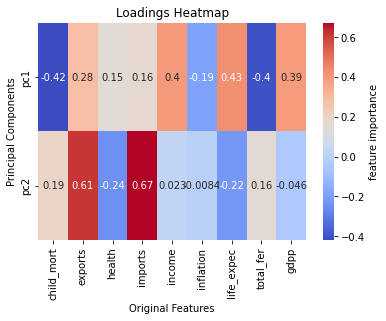

In [ ]:

sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=['pc1','pc2' ], cbar_kws={'label':'feature importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

In pc2 imports and exports have very high values i.e. high feature importance. 


PCA was invented to remove highly correlated variables. Two highly correlated variables have high pca feature importance values e.g. child_mort and total_fer have high values - we see from the heatmap that they are highly correlated as well.

Additionally, gdpp has low feature importance and we see from the heatmap that it very highly correlated with income and would likely be removed if income was to be included.


<AxesSubplot:>

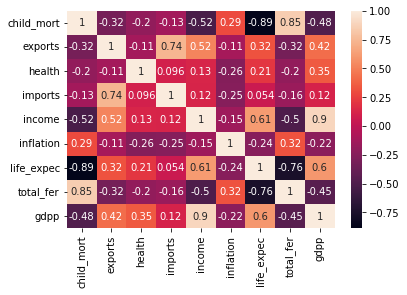

In [ ]:
sns.heatmap(X.corr(), annot=True) 

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [ ]:
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca.explained_variance_ratio_ #gives explained var for pc1, additional explained var for pc2...

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

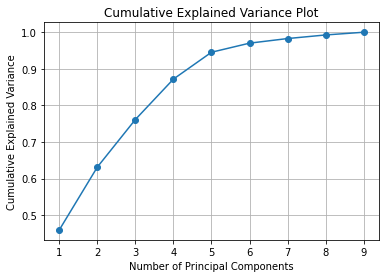

In [ ]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_) 

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

Need to use 6 PCs to retain 95% of the variance.